# Figure 4: 
**Author:** Juan Bolanos  
**Date:** 2025-02-27  
**Description:** This notebook generates Figure 4A, plotting Lineages Through Time from [BEAST Transition Counts](https://www.beast2.org/2021/01/20/counting-state-transitions.html)
output.<br>
**Files Needed**: 
* [BEAST_Transition_Counter_Output.txt](https://zenodo.org/records/14941287/files/BEAST_Transition_Counter_Output.txt?download=1)



Find all date here:
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.14941287.svg)](https://doi.org/10.5281/zenodo.14941287)

### Step 1: Install Libraries

In [6]:
# Function to install missing packages
install_if_missing <- function(packages) {
    to_install <- packages[!(packages %in% installed.packages()[,"Package"])]
    if(length(to_install)) install.packages(to_install, dependencies = TRUE)
}

# List of required libraries
required_packages <- c("ggplot2", "tidyr", "dplyr", "glue", "tidyverse")

# Install missing packages
install_if_missing(required_packages)

# Load libraries
library(ggplot2)
library(tidyr)
library(dplyr)
library(glue)
library(tidyverse)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘glue’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Step 2: Read BEAST Transition Counter file 


In [9]:
#Read transition count file.
Combined <-"/Users/juanbolanos/Desktop/Phylogenetisc_Paper/zenodo_data/BEAST_Transition_Counter_Output.txt"


### Step 3: Plot

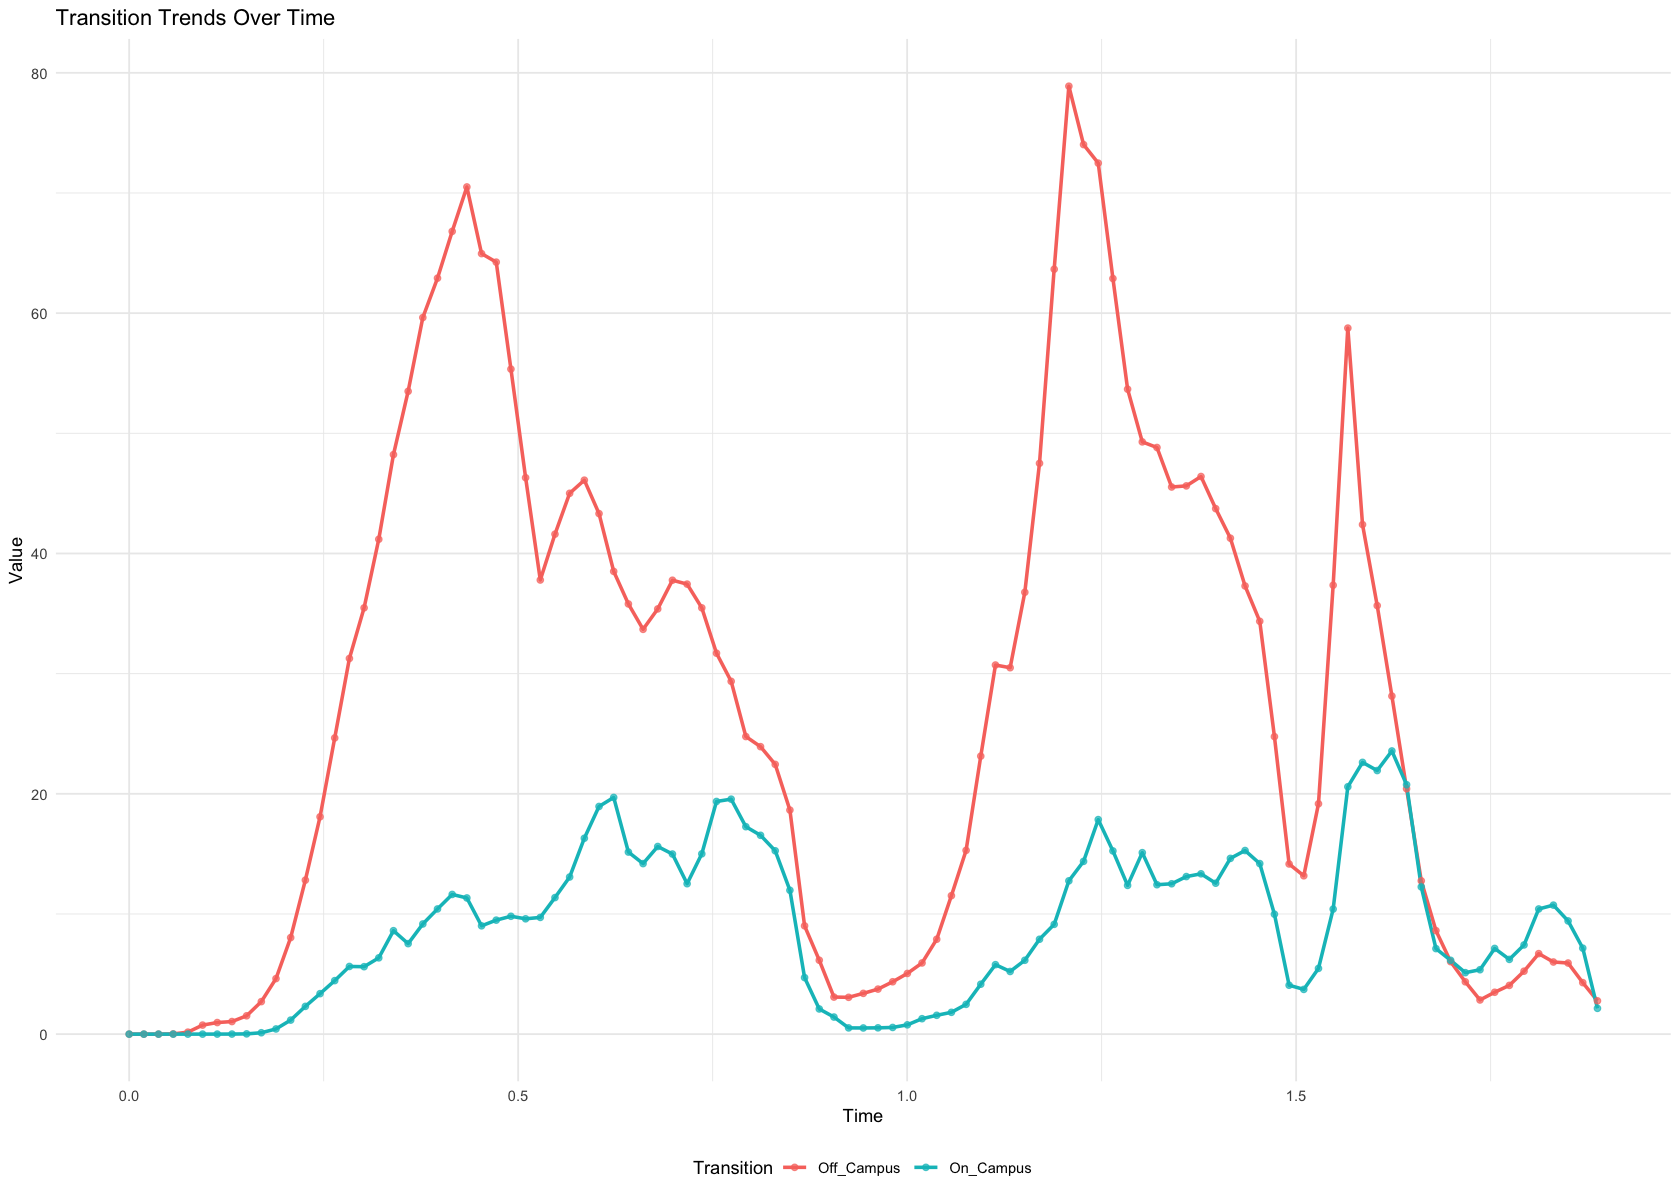

In [22]:
  
plotBEASTLTT<-function(file_path){  # Feed in a file path to the transitioncounteroutput
# Read the file into a character vector
lines <- readLines(file_path)
#find start line
ltt_start <- grep("^Lineages", lines)

# Identify the next section (e.g., "Lineages through time") to find the histogram's end
lttnext_section <- grep("^Introduction", lines)


endoflttsection<-lttnext_section -1
# Read histogram data
ltt_data <- read.table(text = lines[(ltt_start + 1): endoflttsection], 
                        header = TRUE, sep = "\t", check.names = FALSE, fill = TRUE)

# Remove blank columns (columns with all NAs or empty names)
ltt_data <- ltt_data %>% select(where(~!all(is.na(.))))  # Drops empty columns

# Convert from wide to long format
ltt_long <- ltt_data %>%
  pivot_longer(cols = -Transition, names_to = "Time", values_to = "Value") %>%
  mutate(Time = as.numeric(Time), Value = as.numeric(Value))

# Filter for Off_Campus and On_Campus
ltt_filtered <- ltt_long %>%
  filter(Transition %in% c("Off_Campus", "On_Campus"))

#adjust plot size in notebook, ignore this line if not using jupyter notebook.
options(repr.plot.width = 14, repr.plot.height = 10)

# Plot
gg<-ggplot(ltt_filtered, aes(x = Time, y = Value, color = Transition)) +
  geom_line(size = 1) +
  geom_point(size = 1.5, alpha = 0.7) + 
  labs(title = "Transition Trends Over Time", x = "Time", y = "Value") +
  theme_minimal() +
  theme(legend.position = "bottom")
  print(gg)

  }
  
#usage
AllLTTData<-plotBEASTLTT(Combined)


ERROR: Error in parse(text = input): <text>:1:1: unexpected input
1: %python
    ^
